In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Discrete probability distributions

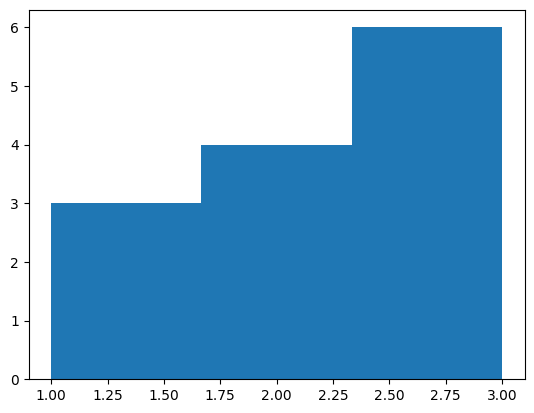

In [2]:
t = [1,2,2,3,1,2,3,2,1,3,3,3,3]

plt.hist(t, 3)
plt.show()

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
n = float(len(t))
pmf = {}
for x, freq in hist.items():
    pmf[x] = freq / n
    print(pmf[x])

0.23076923076923078
0.3076923076923077
0.46153846153846156


Normalization

Dartmouth, 5000 students, 300 professors

Columbia, 11000 students, 500 professors

Brown, 8000 students, 400 professors 

Cornell, 16000 students, 650 professors

In [4]:
dartmouth = 5000/300
columbia = 11000/500
brown = 8000/400
cornell = 16000/650

print(f"Dartmouth, {dartmouth:.4}")
print(f"Columbia, {columbia:.4}")
print(f"Brown, {brown:.4}")
print(f"Cornell, {cornell:.4}")

Dartmouth, 16.67
Columbia, 22.0
Brown, 20.0
Cornell, 24.62


Normalized probability density function (PMF)

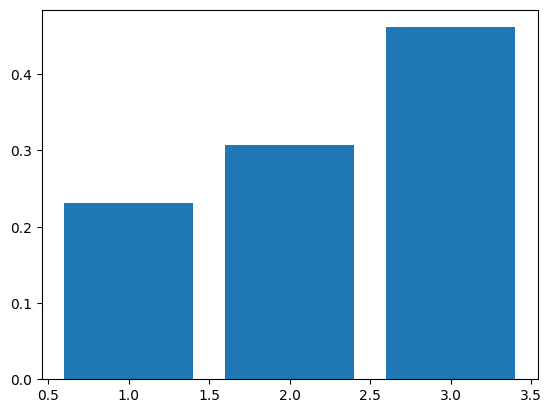

In [5]:
plt.bar(pmf.keys(), pmf.values())
plt.show()

Continuous Probability Distributions

In [6]:
sns.set_theme(style="whitegrid")
data=sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
column = data["tip"]
min_value = column.min() 
print(min_value)
max_value = column.max() 
print(max_value)

1.0
10.0


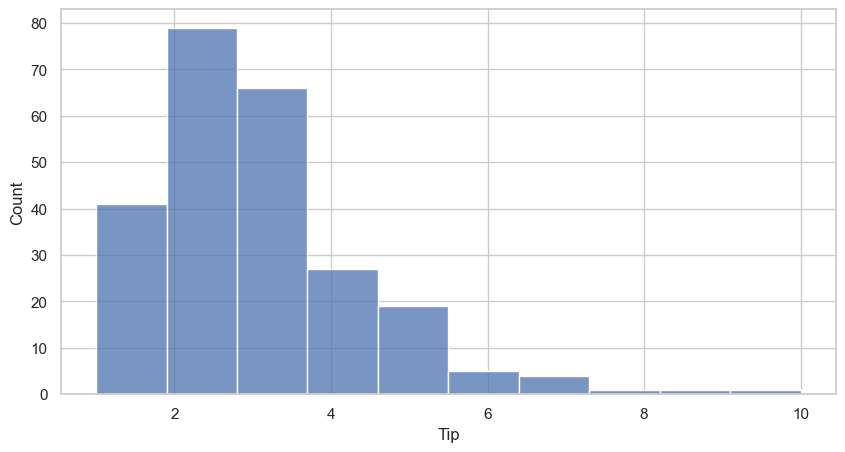

In [8]:
plt.figure(figsize=(10,5))
plt.ylabel('Count')
plt.xlabel('Tip')
sns.histplot(data['tip'], bins=10, kde=False)
plt.show()

In [9]:
between = data[data['tip'].between(1, 2, inclusive='neither')] 
len(between)

41

In [10]:
print(f"{len(between)/len(data):.4f}")

0.1680


Probability density function (PDF)

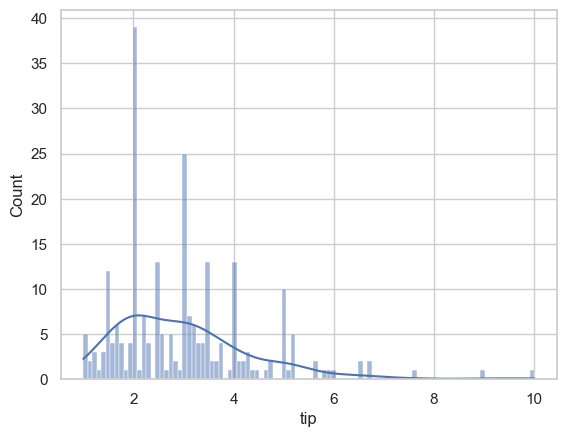

In [11]:
sns.histplot(data['tip'], bins=100, kde=True)
plt.show()

Normal or Gaussian distribution

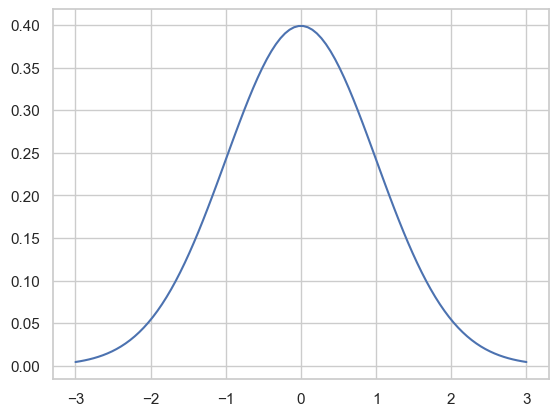

In [12]:
mu = 0 # mu is the mean
sigma = 1 # sigma is the standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

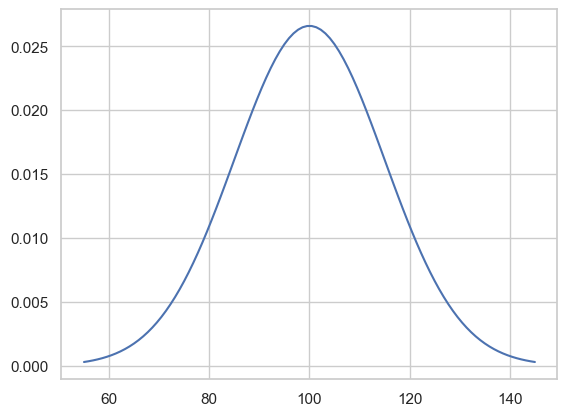

In [13]:
mu = 100 # mu is the mean
sigma = 15 # sigma is the standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [14]:
from scipy.stats import norm

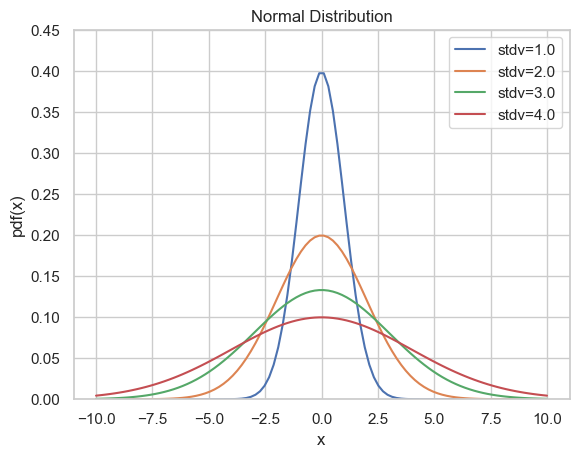

In [15]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

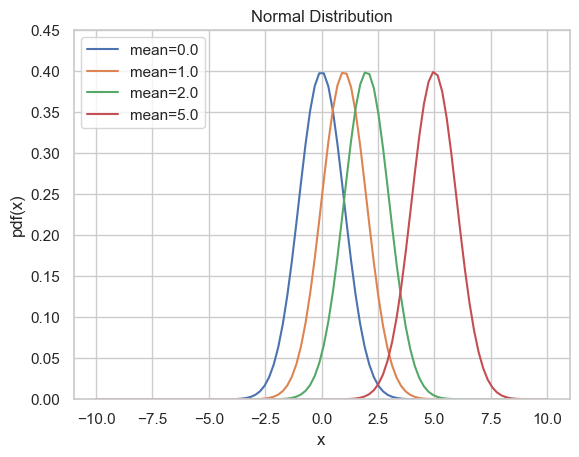

In [16]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

Cumulative distribution function

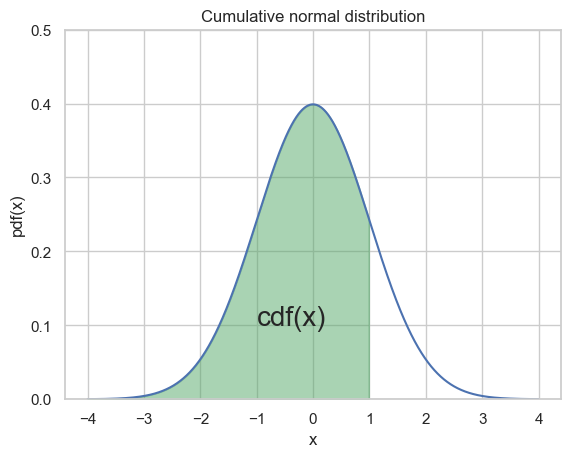

In [17]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

Calculating the probability of normal distribution

0.3085375387259869


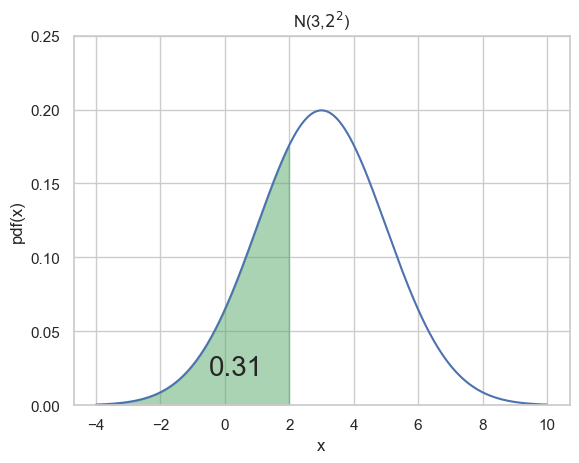

In [18]:
from scipy.stats import norm
lessthan2=norm.cdf(x=2, loc=3, scale=2)
print(lessthan2)

fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
ax.text(-0.5,0.02,round(lessthan2,2), fontsize=20)
plt.show()

Interval between variables

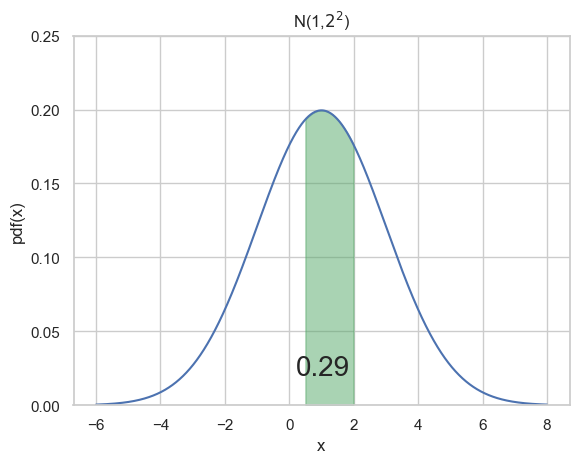

In [19]:
fig, ax = plt.subplots()
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("N(1,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(0.5,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='g')
pro=norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

Survival function

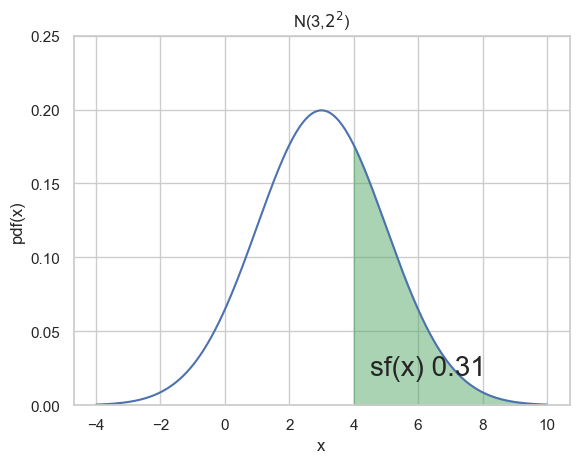

In [20]:
fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(4,10,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
ax.text(4.5,0.02,"sf(x) %.2f" %(norm.sf(x=4, loc=3, scale=2)), fontsize=20)
plt.show()

Total area under the curve

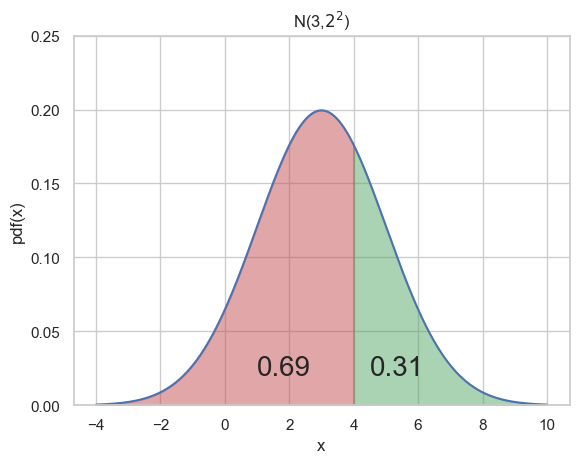

In [21]:
gr4=norm.cdf(x=4, loc=3, scale=2)
gr14=1-gr4
fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(4,10,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
px1=np.arange(-4,4,0.01)
ax.fill_between(px1,norm.pdf(px1,loc=3,scale=2),alpha=0.5, color='r')
ax.text(4.5,0.02,round(gr14,2), fontsize=20)
ax.text(1,0.02,round(gr4,2), fontsize=20)
plt.show()

Quantile

In [22]:
data = [1, 3, 5, 6, 9, 11, 12, 13, 19, 21, 22, 32, 35, 36, 45, 44, 55, 68, 79, 80, 81, 88, 90, 91, 92, 100, 112, 113, 114, 120, 121, 132, 145, 146, 149, 150, 155, 180, 189, 190]

data = [1, 3, 5, 6, 9, 11, 12, 13, 19, 21, 22, 32, 35, 36, 45, 44, 55, 68, 79, 80, 81, 88, 90, 91, 92, 100, 112, 113, 114, 120, 121, 132, 145, 146, 149, 150, 155, 180, 189, 190]

In [23]:
len(data)

40

In [ ]:
i = int(.2*(len(data) + 1))
print(i)
print(data[i-1]) # - 1 because we start counting at 0 here



8
13


Quantile function or the Percent point function

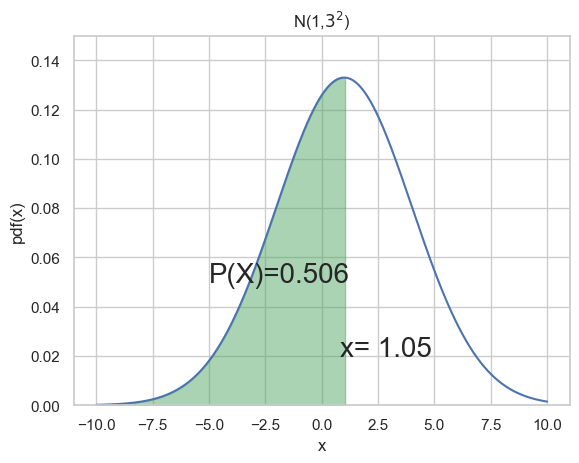

In [24]:
fig, ax = plt.subplots()
x= np.arange(-10,10,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=3))
ax.set_title("N(1,$3^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
xpoint=norm.ppf(q=0.506, loc=1, scale=3)
px=np.arange(-10,xpoint,0.01)
ax.set_ylim(0,0.15)
ax.fill_between(px,norm.pdf(px,loc=1,scale=3),alpha=0.5, color='g')
ax.text(.8,0.02,"x= %.2f" %xpoint, fontsize=20)
ax.text(-5,0.05,"P(X)=0.506", fontsize=20)
plt.show()

Inverse survival function

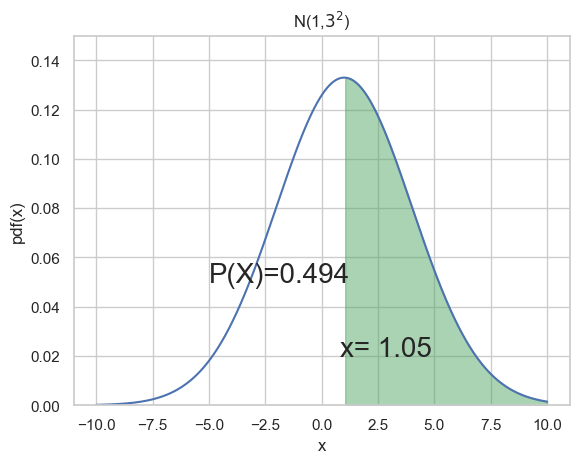

In [25]:
fig, ax = plt.subplots()
x= np.arange(-10,10,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=3))
ax.set_title("N(1,$3^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
xpoint=norm.isf(q=(0.494), loc=1, scale=3)
px=np.arange(xpoint,10,0.01)
ax.set_ylim(0,0.15)
ax.fill_between(px,norm.pdf(px,loc=1,scale=3),alpha=0.5, color='g')
ax.text(.8,0.02,"x= %.2f" %xpoint, fontsize=20)
ax.text(-5,0.05,"P(X)=0.494", fontsize=20)
plt.show()

Interval around the mean

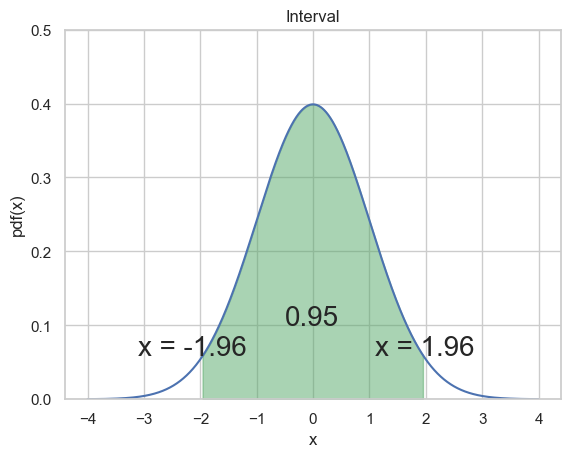

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

a, b = norm.interval(confidence=0.95, loc=0, scale=1)
fig, ax = plt.subplots()
x = np.arange(-4, 4, 0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Interval")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px = np.arange(a, b, 0.01)
ax.set_ylim(0, 0.5)
ax.fill_between(px, norm.pdf(px), alpha=0.5, color='g')
ax.text(-3.1, 0.06, "x = -1.96", fontsize=20)
ax.text(-0.5, 0.1, "0.95", fontsize=20)
ax.text(1.1, 0.06, "x = 1.96", fontsize=20)
plt.show()

In [28]:
ppf = norm.ppf(0.95)
cdf = norm.cdf(1.6448536269514722)
print(ppf)
print(cdf)

1.6448536269514722
0.95


Inverses of each other

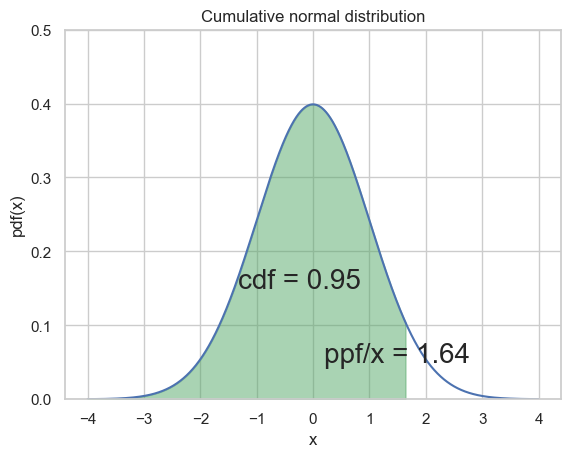

In [29]:
fig, ax = plt.subplots()

x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-4,ppf,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px, norm.pdf(px),alpha=0.5, color='g')
ax.text(-1.33,0.15,"cdf = 0.95", fontsize=20)

ax.text(.2,0.05,"ppf/x = 1.64", fontsize=20)
plt.show()

Student's T-Distribution

data = (x - mean(x)) / S / sqrt(n))

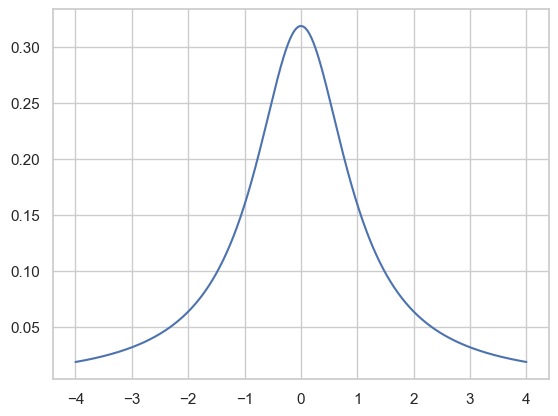

In [30]:
from scipy.stats import t
fig, ax = plt.subplots()
x = np.arange(-4, 4, 0.001)
dof = 1
pdf = t.pdf(x, dof)
ax.plot(x, pdf)
plt.show()



Degrees of freedom

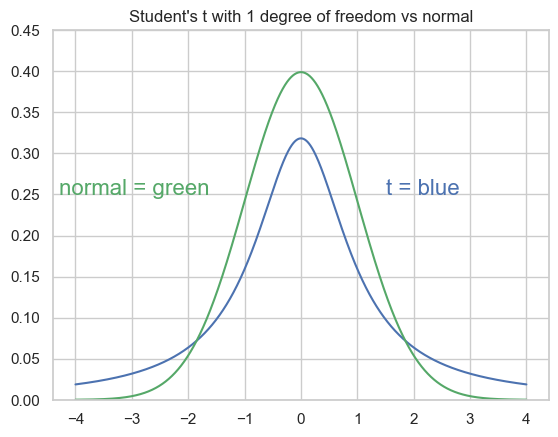

In [31]:
fig, ax = plt.subplots()

ax.set_title("Student's t with 1 degree of freedom vs normal")
x = np.arange(-4, 4, 0.001)
dof = 1
ax.set_ylim(0, 0.45)
pdf = t.pdf(x, dof)
ax.plot(x, pdf)

x2= np.arange(-4,4,0.001)
ax.plot(x2, norm.pdf(x2), color='g')

ax.text(-4.3,0.25,"normal = green", fontsize=16, color='g')

ax.text(1.5,0.25,"t = blue", fontsize=16, color='b')


plt.show()

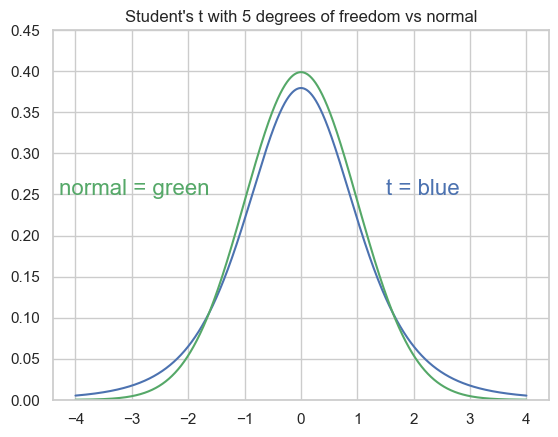

In [32]:
fig, ax = plt.subplots()
x = np.arange(-4, 4, 0.001)
ax.set_title("Student's t with 5 degrees of freedom vs normal")

ax.set_ylim(0,0.45)
dof = 5
pdf = t.pdf(x, dof)
ax.plot(x, pdf)


x2= np.arange(-4,4,0.001)
ax.plot(x2, norm.pdf(x2), color='g')

ax.text(-4.3,0.25,"normal = green", fontsize=16, color='g')

ax.text(1.5,0.25,"t = blue", fontsize=16, color='b')

plt.show()

Comulative student's T distribution

In [33]:
x = np.arange(-4, 4, 0.001)
dof = 1
ppf = t.ppf(0.55, dof)
ppf

0.15838444032458646

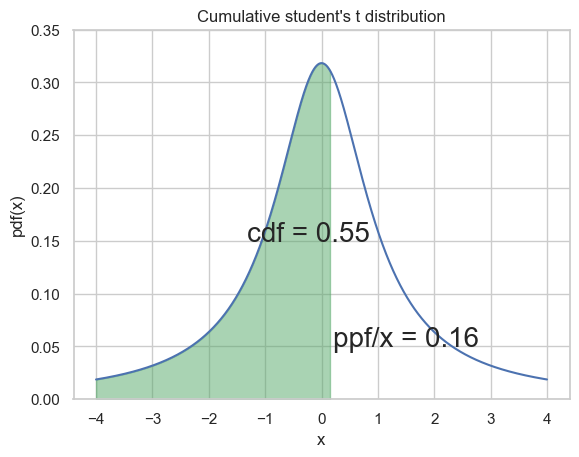

In [34]:
fig, ax = plt.subplots()
ax.plot(x, t.pdf(x, dof))
ax.set_title("Cumulative student's t distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
px=np.arange(-4, ppf, 0.01)
ax.set_ylim(0,0.35)
ax.fill_between(px, t.pdf(px, dof), alpha=0.5, color='g')
ax.text(-1.33,0.15,"cdf = 0.55", fontsize=20)
ax.text(.2,0.05,"ppf/x = 0.16", fontsize=20)

plt.show()

Uniform distribution

Discrete

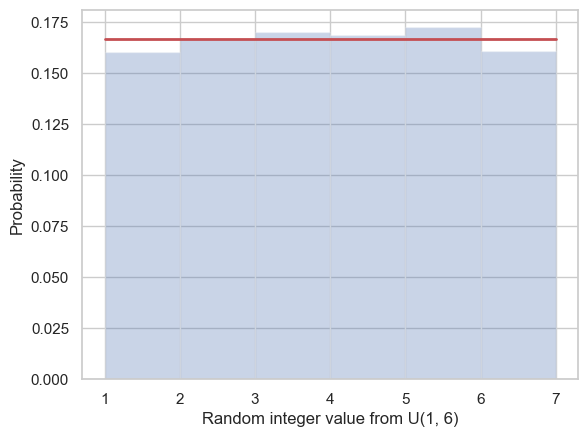

In [38]:
sample = [np.random.random_integers(1, 6) for i in range(5000)] 

count, bins, ignored = plt.hist(sample, 6, (1, 7), density=True, alpha=0.3)
plt.plot(bins, np.zeros_like(bins)+1/6, linewidth=2, color='r')
plt.xlabel('Random integer value from U(1, 6)')
plt.ylabel('Probability')
plt.show()

Continuous

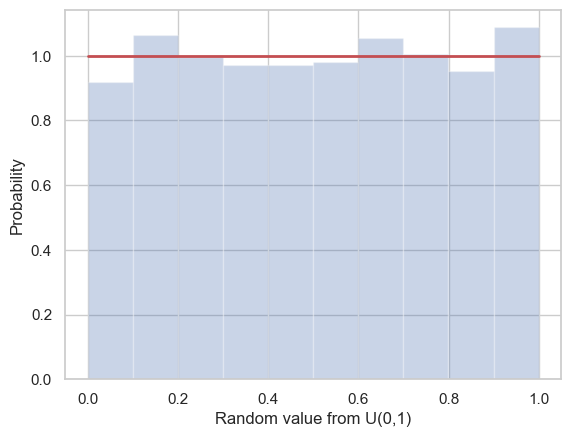

In [39]:
# Get 5000 random variables between 0 and 1
sample = [np.random.uniform(0, 1) for i in range(5000)] 

count, bins, ignored = plt.hist(sample, 10, density=True, alpha=0.3)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.xlabel('Random value from U(0,1)')
plt.ylabel('Probability')
plt.show()

Exponential distribution


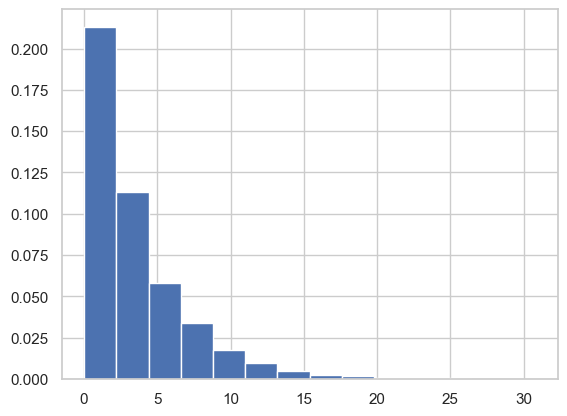

In [40]:
gfg = np.random.exponential(3.45, 10000)
  
count, bins, ignored = plt.hist(gfg, 14, density = True,)
plt.show()

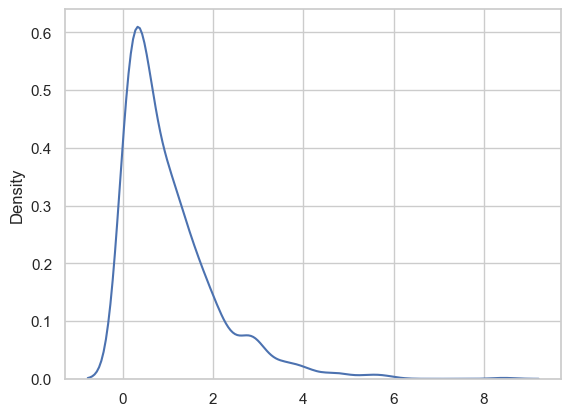

In [41]:
sns.distplot(np.random.exponential(size=1000), hist=False)

plt.show()

Binomial distribution

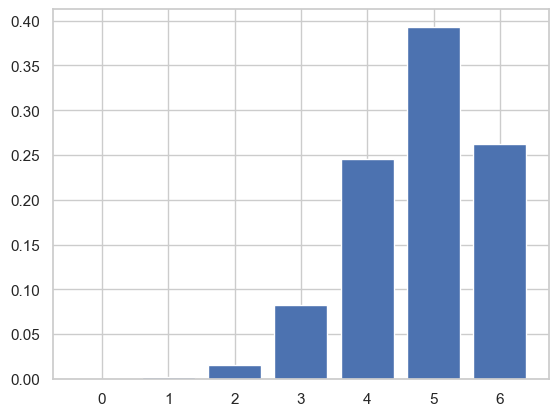

In [42]:
# setting the values
# of n and p
n = 6
p = 0.8
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [stats.binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
plt.show()

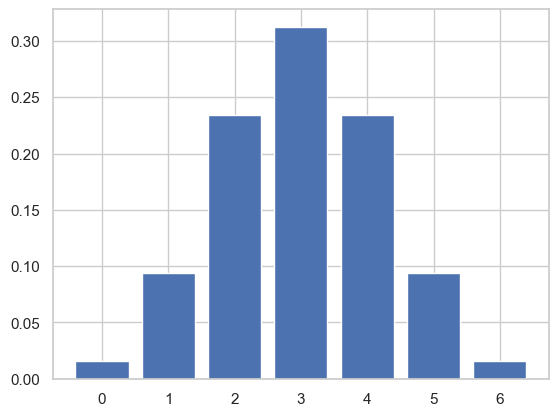

In [43]:
# setting the values
# of n and p
n = 6
p = 0.5
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [stats.binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
plt.show()

Chi-Squared distribution

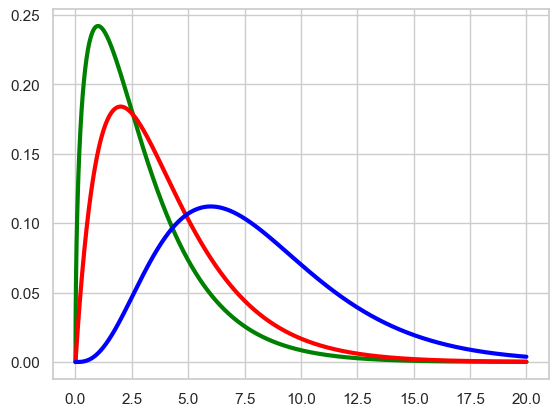

In [44]:
from scipy.stats import chi2

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with 1 degrees of freedom

plt.plot(x, chi2.pdf(x, df=3), color='green', linewidth=3)
plt.plot(x, chi2.pdf(x, df=4), color='red', linewidth=3)
plt.plot(x, chi2.pdf(x, df=8), color='blue', linewidth=3)

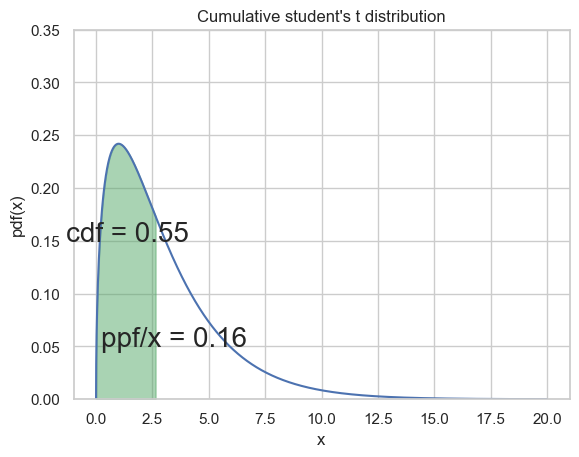

In [45]:
x = np.arange(0, 20, 0.001)
dof = 3
ppf = chi2.ppf(0.55, dof)
ppf

fig, ax = plt.subplots()
ax.plot(x, chi2.pdf(x, dof))
ax.set_title("Cumulative student's t distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
px=np.arange(0, ppf, 0.01)
ax.set_ylim(0,0.35)
ax.fill_between(px, chi2.pdf(px, dof), alpha=0.5, color='g')
ax.text(-1.33,0.15,"cdf = 0.55", fontsize=20)
ax.text(.2,0.05,"ppf/x = 0.16", fontsize=20)
plt.show()

F-Distribution

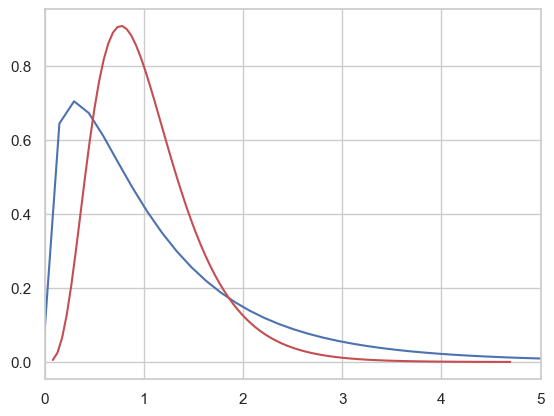

In [46]:
from scipy.stats import f

# first f
rv1 = f(dfn=3, dfd=15, loc=0, scale=1)
x = np.linspace(rv1.ppf(0.0001), rv1.ppf(0.9999), 100)
y = rv1.pdf(x) 

plt.xlim(0,5)
plt.plot(x,y, 'b')

# second f 
rv2 = f(dfn=10, dfd=50, loc=0, scale=1)
x = np.linspace(rv2.ppf(0.0001), rv2.ppf(0.9999), 100)
y = rv2.pdf(x) 

plt.plot(x,y, 'r')


f = [ s^2/σ^2 ] / [ s^2/σ^2 ]